In [ ]:
import tensorflow as tf
print ("TensorFlow version: " + tf.__version__)

TensorFlow version: 2.3.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.util import ngrams
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer 
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
import gensim
import string

In [ ]:
train= pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [ ]:
test.head(3)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."


In [ ]:
print('There are {} rows and {} columns in train'.format(train.shape[0],train.shape[1]))
print('There are {} rows and {} columns in test'.format(test.shape[0],test.shape[1]))

There are 7613 rows and 5 columns in train
There are 3263 rows and 4 columns in test


In [ ]:
len(test)

3263

In [ ]:
len(train)

7613

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'samples')

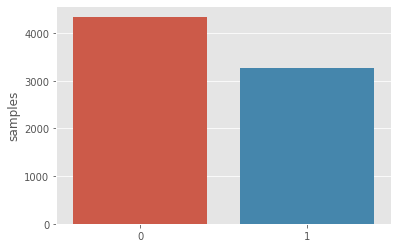

In [ ]:
x=train.target.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

## Cleaning The *Data* **bold text**

In [ ]:
from nltk.corpus import stopwords
import re
import string

In [ ]:
def change_contraction_verb(text):
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    
    # specific
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    return text

train['text'] = train['text'].apply(lambda x : change_contraction_verb(x))

test['text'] = test['text'].apply(lambda x : change_contraction_verb(x))

train['text'].head(10)

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to  ishelter in place' are...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
5    #RockyFire Update => California Hwy. 20 closed...
6    #flood #disaster Heavy rain causes flash flood...
7    I am on top of the hill and I can see a fire i...
8    There is an emergency evacuation happening now...
9    I am afraid that the tornado is coming to our ...
Name: text, dtype: object

In [ ]:
  def custom_preprocessor(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub('\.com', "", text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

train['text'] = train['text'].apply(lambda x : custom_preprocessor(x))
test['text'] = test['text'].apply(lambda x : custom_preprocessor(x))

train['text'].head(10)

0    our deeds are the reason of this  earthquake m...
1               forest fire near la ronge sask  canada
2    all residents asked to  ishelter in place  are...
3      people receive  wildfires evacuation orders ...
4    just got sent this photo from ruby  alaska as ...
5     rockyfire update    california hwy   closed i...
6     flood  disaster heavy rain causes flash flood...
7    i am on top of the hill and i can see a fire i...
8    there is an emergency evacuation happening now...
9    i am afraid that the tornado is coming to our ...
Name: text, dtype: object

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbolds / pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
train['text'] = train['text'].apply(lambda x : remove_emoji(x))
test['text'] = test['text'].apply(lambda x : remove_emoji(x))

In [ ]:
train.head(15)

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake m...,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,all residents asked to ishelter in place are...,1
3,6,NaN,NaN,people receive wildfires evacuation orders ...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska as ...,1
5,8,NaN,NaN,rockyfire update california hwy closed i...,1
6,10,NaN,NaN,flood disaster heavy rain causes flash flood...,1
7,13,NaN,NaN,i am on top of the hill and i can see a fire i...,1
8,14,NaN,NaN,there is an emergency evacuation happening now...,1
9,15,NaN,NaN,i am afraid that the tornado is coming to our ...,1


In [ ]:
test.head(15)

,id,keyword,location,text
0,0,NaN,NaN,just happened a terrible car crash
1,2,NaN,NaN,heard about earthquake is different cities s...
2,3,NaN,NaN,there is a forest fire at spot pond geese are...
3,9,NaN,NaN,apocalypse lighting spokane wildfires
4,11,NaN,NaN,typhoon soudelor kills in china and taiwan
5,12,NaN,NaN,we are shaking it is an earthquake
6,21,NaN,NaN,they would probably still show more life than ...
7,22,NaN,NaN,hey how are you
8,27,NaN,NaN,what a nice hat
9,29,NaN,NaN,fuck off


In [ ]:
STOPWORDS.add('https')  # remove htps to the world Cloud

def Plot_world(text):
    
    comment_words = ' '
    stopwords = set(STOPWORDS) 
    
    for val in text: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '

In [ ]:
def clean_text(text):
 text = text.split()  
 text = [w for w in text if not w in set(stopwords.words('english'))] 
 text = ' '.join(text)    
 return text

In [ ]:
text = train.text[3]
print(text)

  people receive  wildfires evacuation orders in california 


In [ ]:
def counter_word (text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

In [ ]:
text_values = train["text"]

counter = counter_word(text_values)


In [ ]:
print(f"The len of unique words is: {len(counter)}")
list(counter.items())[:10]

The len of unique words is: 15846


[('our', 100),
 ('deeds', 2),
 ('are', 545),
 ('the', 3272),
 ('reason', 20),
 ('of', 1829),
 ('this', 480),
 ('earthquake', 50),
 ('may', 87),
 ('allah', 9)]

# Train Test Split

In [ ]:
# The maximum number of words to be used. (most frequent)

vocab_size = len(counter)
embedding_dim = 32

# Max number of words in each complaint.
max_length = 20
trunc_type='post'
padding_type='post'

# oov_took its set for words out our word index
oov_tok = "<XXX>"
training_size = 6090
seq_len = 12

In [ ]:
training_sentences = train.text[0:training_size]
training_labels = train.target[0:training_size]

testing_sentences = train.text[training_size:]
testing_labels = train.target[training_size:]

In [ ]:
print('The Shape of training ',training_sentences.shape)
print('The Shape of testing',testing_sentences.shape)


The Shape of training  (6090,)
The Shape of testing (1523,)


# **Create Text Encoder**

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## **Creating The Model**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(14, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True]


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 32)            507072    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               49664     
_________________________________________________________________
dense_2 (Dense)              (None, 14)                1806      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 15        
Total params: 558,557
Trainable params: 558,557
Non-trainable params: 0
_________________________________________________________________


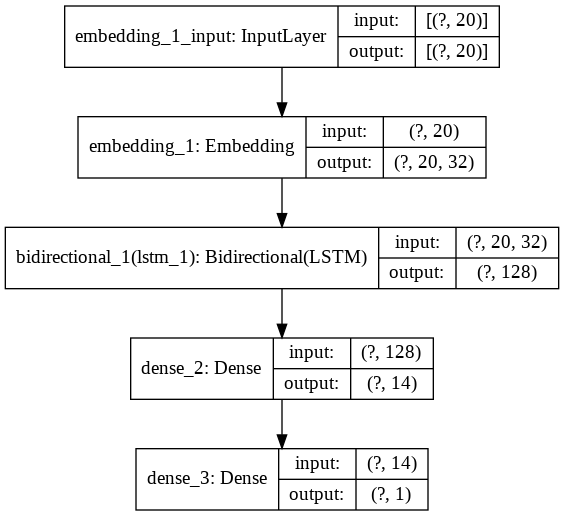

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

## **Train The Model**

In [ ]:
history = model.fit(training_padded, training_labels, epochs=10, validation_data=(testing_padded, testing_labels))

Epoch 1/10
191/191 [==============================] - 5s 28ms/step - loss: 0.7388 - accuracy: 0.5765 - val_loss: 0.6928 - val_accuracy: 0.5345
Epoch 2/10
191/191 [==============================] - 5s 24ms/step - loss: 0.6879 - accuracy: 0.5803 - val_loss: 0.6628 - val_accuracy: 0.5555
Epoch 3/10
191/191 [==============================] - 5s 24ms/step - loss: 0.6300 - accuracy: 0.7826 - val_loss: 0.6253 - val_accuracy: 0.7511
Epoch 4/10
191/191 [==============================] - 5s 25ms/step - loss: 0.5990 - accuracy: 0.8442 - val_loss: 0.6209 - val_accuracy: 0.7623
Epoch 5/10
191/191 [==============================] - 5s 25ms/step - loss: 0.5898 - accuracy: 0.8632 - val_loss: 0.6274 - val_accuracy: 0.7584
Epoch 6/10
191/191 [==============================] - 5s 25ms/step - loss: 0.5842 - accuracy: 0.8767 - val_loss: 0.6260 - val_accuracy: 0.7584
Epoch 7/10
191/191 [==============================] - 5s 26ms/step - loss: 0.5800 - accuracy: 0.8862 - val_loss: 0.6311 - val_accuracy: 0.7544

In [ ]:
training_loss, training_acc = model.evaluate(training_padded, training_labels)
print('Training Loss: {}'.format(training_loss))
print('Training Accuracy: {}'.format(training_acc))

191/191 [==============================] - 1s 4ms/step - loss: 0.5743 - accuracy: 0.8993
Training Loss: 0.5742883682250977
Training Accuracy: 0.8993431925773621


(0.5163592278957367, 1.0)

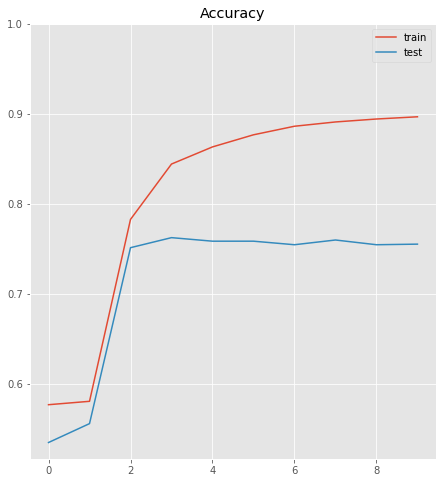

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label = 'train' )
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.ylim(None,1)

(0.5675178080797195, 1.0)

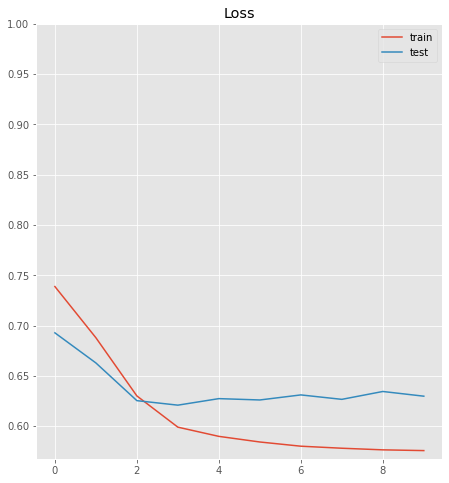

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(history.history['loss'], label = 'train' )
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.ylim(None,1)

## **Predictions**

In [ ]:
predictions = model.predict(testing_padded)
print(predictions[0])

[9.244056e-06]


# Test Data 

In [ ]:
testing_sequences2 = tokenizer.texts_to_sequences(test.text)
testing_padded2 = pad_sequences(testing_sequences2, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
predictions = model.predict(testing_padded2)

In [ ]:
test_loss, test_acc = model.evaluate(testing_padded, testing_labels)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

48/48 [==============================] - 0s 5ms/step - loss: 0.6471 - accuracy: 0.7288
Test Loss: 0.647050142288208
Test Accuracy: 0.7288246750831604


## **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB()
nv.fit(training_sentences,training_labels)
from sklearn.metrics import accuracy_score
y_pred = nv.predict(testing_sentences) # store the prediction data
accuracy_score(training_labels,y_pred)

ValueError: ignored